# Control Tutorial_4
_Reference : The Control Handbook, Control System Fundamentals, Edited by William S.Levine from p8-8 to p8-18_, [Lecture Notes of Control Systems I - ME 431/Analysis and Synthesis of Linear Control System - ME862](http://www.engr.usask.ca/classes/ME/431/notes/Note_15-2006.pdf), [Part IB Paper 6: Information Engineering LINEAR SYSTEMS AND CONTROL Glenn Vinnicombe](http://www-control.eng.cam.ac.uk/gv/p6/Handout6.pdf)

# The Nyquist Stability Test
---
The Nyquist diagram is the continuation of polar plots for finding the stability of the closed loop control systems by varying $\omega$ from $-\infty$ to $\infty$.   
That means, the Nyquist diagram is used to draw the complete frequency response of the open loop transfer function.

## How to draw the Nyquist diagram
Follow these rules for plotting the Nyquist diagram.
1. Locate the poles and zeros of **open loop transfer function** $G(s)$ in $s$ plane.
2. Draw the polar plot by varying $\omega$ from $0$ to $\infty$. If pole or zero present at $s = 0$, then varying $\omega$ from $0+$ to $\infty$ for drawing polar plot.
3. Draw the mirror image of above polar plot for values of $\omega$ ranging from $-\infty$ to $0$ ($0−$ if any pole or zero present at $s=0$)
4. The number of infinite radius half circles will be equal to the number of poles or zeros at origin. The infinite radius half circle will start at the point where the mirror image of the polar plot ends. And this infinite radius half circle will end at the point where the polar plot starts.

The method `scipy.signal.freqresp` can calculate the frequency response of a continuous-time system in order to generate the Nyquist plot of a transfer function.

## The Nyquist Theorem 
**_The closed loop system is stable if and only if the net number of clockwise encirclement of the points $s=-1+j0$ by the Nyquist diagram of $G(s)$ plus the number of poles of $G(s)$ in the right half-plane is zero._**  
(If the Nyquist diagram encircles the $s=-1+j0$ point in the **counterclockwise** direction, we count **minus**)

# Simulation

In [1]:
from scipy import signal
import numpy as np
from ipywidgets import interactive
import matplotlib.pyplot as plt
%matplotlib inline

Declare the function for drawing the nyquist diagram.  
In `horizon = np.linspace(0,1000,10000)`, we set the range of $\omega$ for the calculation, here we think that 1000 is large enough to calculate the frequency responce.

In [2]:
def nyquist(sys,A=100): #A is a variablethe for the position of arrows.
    horizon = np.linspace(0,1000,10000)
    w, H = signal.freqresp(sys,w=horizon)
    plt.figure()
    plt.axis('equal')
    TEXT1 = r'''$\omega: \,\, 0 \,\to \, \infty$'''
    TEXT2 = r'''$\omega: -\infty \to \, 0$'''
    plt.plot(H.real, H.imag, "b", label=TEXT1)
    plt.arrow(H.real[A], H.imag[A], H.real[A+1]-H.real[A], H.imag[A+1]-H.imag[A],shape='full', lw=0,length_includes_head=True,head_width=.05,color="b")
    plt.plot(H.real, -H.imag, "r",label=TEXT2)
    plt.arrow(H.real[A], -H.imag[A], (H.real[A-1]-H.real[A]), -H.imag[A-1]+H.imag[A],shape='full', lw=0,length_includes_head=True,head_width=.05,color="r")
    plt.plot(-1,0,"ok")
    plt.axhline(y=0,color="k")
    plt.axvline(x=0,color="k")
    plt.ylim(-1.1,1.1)
    plt.title("Nyquist diagram")
    plt.ylabel("Im")
    plt.xlabel("Re")
    plt.legend()
    plt.show()

## Example 1 
<img src="figures/Block.png" hight="100">
Let us consider the simple first order system to illustrate the use of the Nyquist theorem.  
For this system the open loop transfer function is given as:  

$$
G(s)= \frac{5}{s+10}
$$

We declare this system using `scipy.signal.lti`.

In [3]:
def example_sys1():
    num = [5] 
    den = [1, 10] 
    return signal.lti(num, den)

Let us plot the Nyquist diagram of this system.

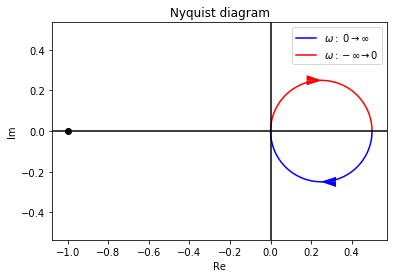

In [4]:
nyquist(example_sys1())

$G(s)= \frac{5}{s+10}$ has only one pole $s=-10$, so the number of poles in the right half-plane is zero.  
Also we see that this Nyquist diagram can never encircle the $s=-1+j0$ point.

Therefore the closed-loop system is stable.  

## Example 2 (from Fundamental Book p8-17)
<img src="figures/Block.png" hight="100">
The open loop transfer function of this system is given as:  

$$
G(s)= \frac{K(s+1)}{(s-1)(s+2)}
$$

In [5]:
def example_sys2(K):
    num = [K,K] 
    den = [1, 1, -2] 
    return signal.lti(num, den)

Let us plot the Nyquist diagram of this system at $K = 1.5,\,2.0,\,2.5$.

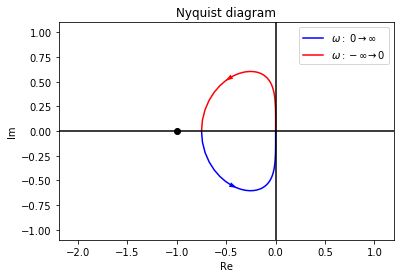

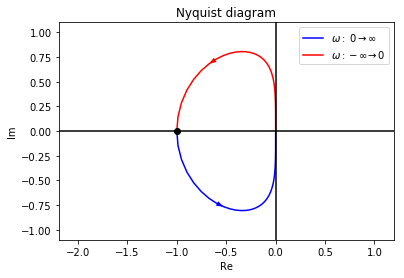

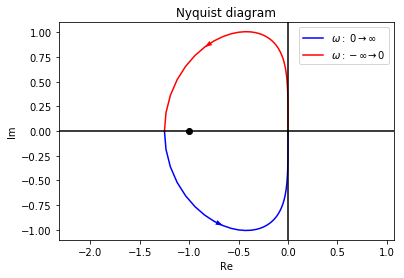

In [6]:
nyquist(example_sys2(1.5),7)
nyquist(example_sys2(2.0),7)
nyquist(example_sys2(2.5),7)

Note that the exact shape of the plot is not very important since the only information we wish to obtain at this time is the number of the $s=-1+j0$ point.   
It is easy to see that the Nyquist diagram encircles the $-1$ point once in the **counterclockwise** if $K>2$ and has no encirclements if $K<2$.  
Since this system has one right half-plane pole $s=1$ in $G(s)$, it is necessary that there be one **counterclockwise** encirclement if the system is to be stable.  
Therefore, this system is stable if and only if $K>2$.